# Guiding questions

In which fields does the international student population overtake the domestic student population?

How important a role do international students play in our graduate programs?

Are students making compromises in academic choices in order to receive better chances of getting work visa?

In [2]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from utils import read_gss
d, ufields = read_gss('../data/GSS_Columbia_Detailed.csv')

In [4]:
DOM_COL_NAME = 'U.S. citizens and permanent residents (non-U.S. citizens holding green cards)'
INT_COL_NAME = 'Foreign nationals'

DOM_LABEL = 'U.S. citizens & permanent residents'
INT_LABEL = INT_COL_NAME

In [5]:
years = np.arange(1994, 2017)

def plotField(ax, field):
    domestic = []
    international = []
    
    for year in years:
        counts = d[year][field]
        domestic.append(counts.get(DOM_COL_NAME, None))
        international.append(counts.get(INT_COL_NAME, None))

    ax.plot(years, domestic, label=DOM_LABEL)
    ax.plot(years, international, label=INT_LABEL)
    
    ax.set_title(field)
    ax.set(xlabel='Year', ylabel='Number of graduate students')

IndexError: index 16 is out of bounds for axis 0 with size 16

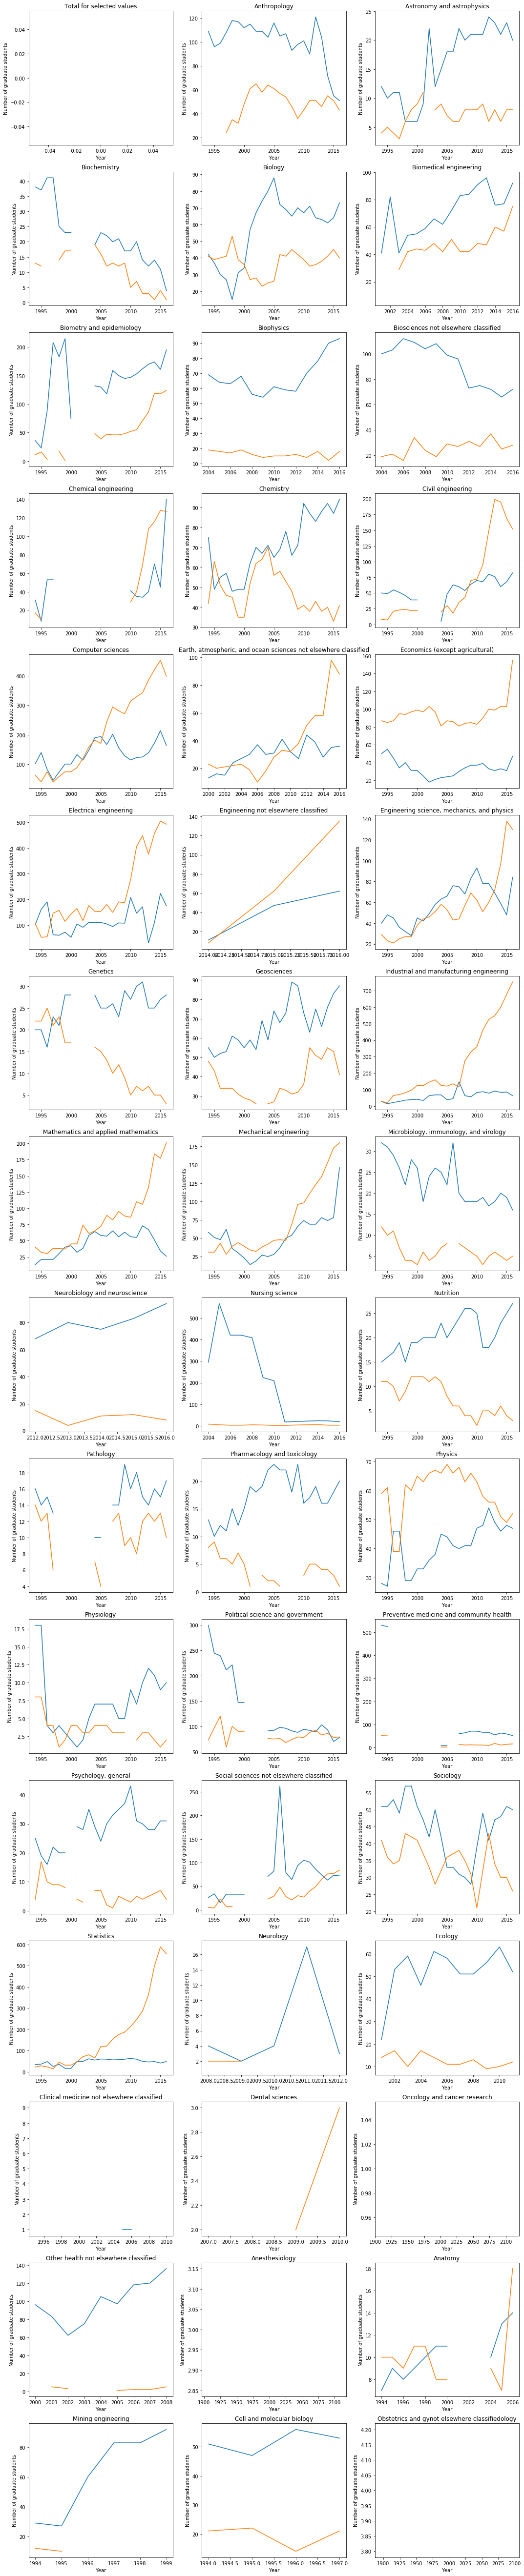

In [6]:
cols = 3
rows = int(len(ufields) / cols)

_, axarr = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows))

for i in range(len(ufields)):
    plotField(axarr[ i // cols, i % cols ], ufields[i])
    
axarr[0, 0].legend()

Let's isolate those STEM fields that see the greatest international student increases.

In [ ]:
ufields

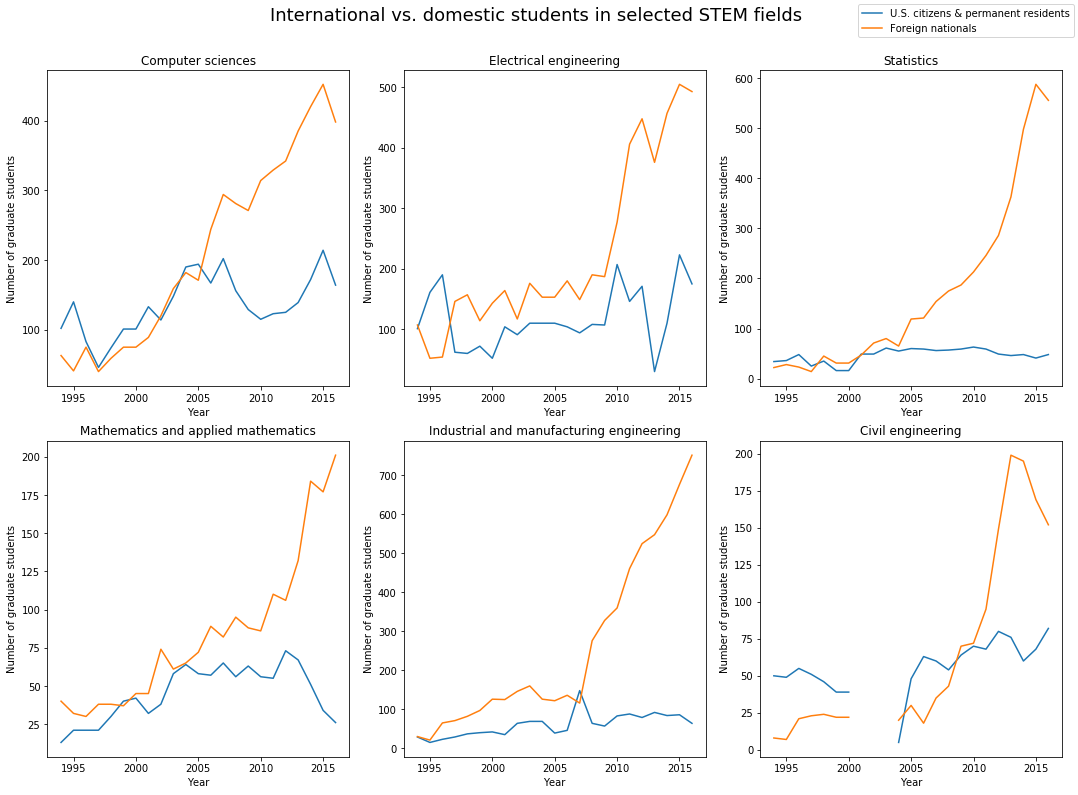

In [91]:
fieldsOfInterest = [
    'Computer sciences',
    'Electrical engineering',
    'Statistics',
    # 'Earth, atmospheric, and ocean sciences not elsewhere classified',
    'Mathematics and applied mathematics',
    'Industrial and manufacturing engineering',
    'Civil engineering',
]

fig, axarr = plt.subplots(2, 3, figsize=(15, 11))

for i in range(len(fieldsOfInterest)):
    plotField(axarr[i // 3, i % 3], fieldsOfInterest[i])

handles, labels = axarr[-1, -1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

fig.tight_layout()
st = fig.suptitle("International vs. domestic students in selected STEM fields", fontsize=18)
st.set_y(1)
fig.subplots_adjust(top=.92)
fig.savefig('selected_detailed_fields.png')


What do international students study at Columbia?

In [7]:
intrCounts = {}

for f in ufields:
    ary = [d[year][f].get(INT_COL_NAME, 0) for year in years]
    intrCounts[f] = ary

In [8]:
yearTotals = [sum(a) for a in zip(*intrCounts.values())]
yearTotals

[947.0,
 911.0,
 869.0,
 860.0,
 1043.0,
 957.0,
 1060.0,
 997.0,
 1051.0,
 1154.0,
 1443.0,
 1474.0,
 1594.0,
 1641.0,
 1889.0,
 1986.0,
 2180.0,
 2590.0,
 2923.0,
 3137.0,
 3631.0,
 3976.0,
 4082.0]

In [27]:
def sumWithNone(item):
    s = 0
    for x in item[1]:
        if x is not None:            
            s += x
    return s

topFields = sorted(intrCounts.items(), key=sumWithNone, reverse=True)

Done


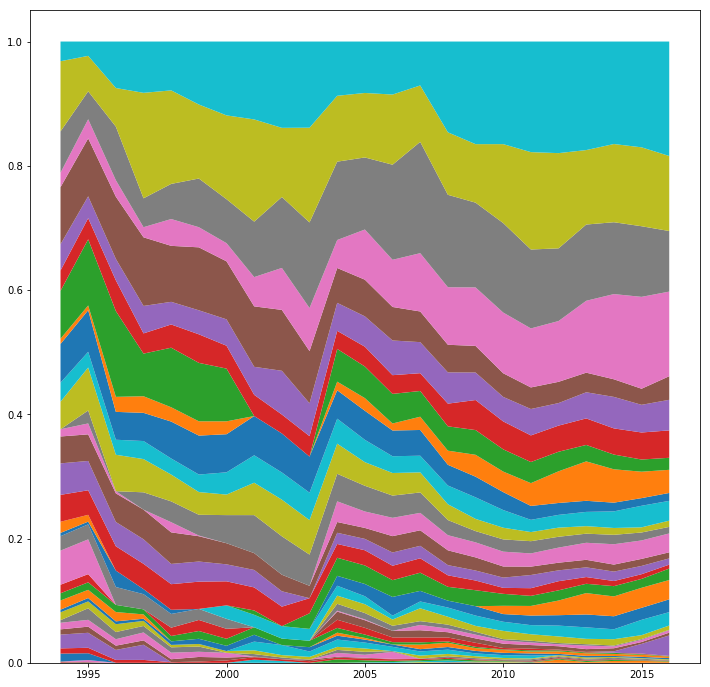

In [95]:
def getProportions(a):
    return [a[i] / yearTotals[i] for i in range(len(a))]

plt.figure(figsize=(12, 12))
areas = []
labels = []
for f in reversed(topFields):
    areas.append(getProportions(f[1]))
    labels.append(f[0])
plt.stackplot(years, areas, labels=labels)
# plt.legend()
print('Done')

In [112]:
df = pd.read_csv('../data/GSS_Columbia_Detailed.csv', header=4, index_col=False, thousands=',')
df.columns = [
    'Year', 'Institution Name', 'Detailed Fields', 'Citizenship', 'Count'
]
df = df.drop('Institution Name', 1)
df = df[1:-3] # Drop first row (total) annd last 3 rows (footnotes)
df = df[ df['Citizenship'] == 'Foreign nationals' ]
df = df.drop('Citizenship', 1)

faultyFields = set()
for year in years:
    for f in ufields:
        if d[year][f].get(INT_COL_NAME, None) is None:
            faultyFields.add(f)

df = df[ ~df['Detailed Fields'].isin(faultyFields) ]
df = df.sort_values(['Detailed Fields', 'Year'])

df.to_csv('test.csv', index=False)

## Findings